In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os
os.getcwd()

'd:\\spatial_project\\spatial_ovary_new-main\\Ovary_v4'

In [2]:
from Read_files import read_free_h5ad

In [13]:
adata = sc.read_10x_h5("D:\\spatial_project\\spatial_ovary_new-main\\Ovary_v4\\data\\10x\\10x2_WT\\filtered_feature_bc_matrix.h5")

d:\spatial_project\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\spatial_project\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
scdata = sc.read_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/snOvaryAnno_30102023.h5ad")

In [10]:
adata = read_free_h5ad(DIR="/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/10x2")

In [20]:
adata.obs.head(3)

Empty DataFrame
Columns: []
Index: [AACAATGTGCTCCGAG-1, AACACCATTCGCATAC-1, AACACGTTGATACCGC-1]

In [ ]:
pal = {
  'Ovarian Cells':'#6e40aa',
  "Fallopian Tube Cells":"#8494ffff",
  'Vascular Endothelial Cells':'#a83cb3',
  'Lymphatic Endothelial Cells':'#585fd2',
  'Mesenchymal Cells':'#df40a1',
  'Mononuclear Phagocytes':'#ff507a',
  'Perivascular Cells':'#1fb3d3',
  'T/NK Cells':'#3988e1',
  'Plasma B Cells':'#1bd9ac'
} 
sc.pl.umap(scdata, color='celltype', palette=pal, frameon=False, size=7)

In [21]:
adata

AnnData object with n_obs × n_vars = 4674 × 18085
    var: 'gene_ids', 'feature_types', 'genome'

In [19]:
adata.obsm["proportions"].columns.to_list()

['Fallopian Tube Cells',
 'Lymphatic Endothelial Cells',
 'Mesenchymal Cells',
 'Mononuclear Phagocytes',
 'Ovarian Cells',
 'Perivascular Cells',
 'Plasma B Cells',
 'T/NK Cells',
 'Vascular Endothelial Cells']

In [20]:
ct_list = adata.obsm["proportions"].columns.to_list()
for ct in ct_list:
    data = adata.obsm["proportions"][ct].values
    adata.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

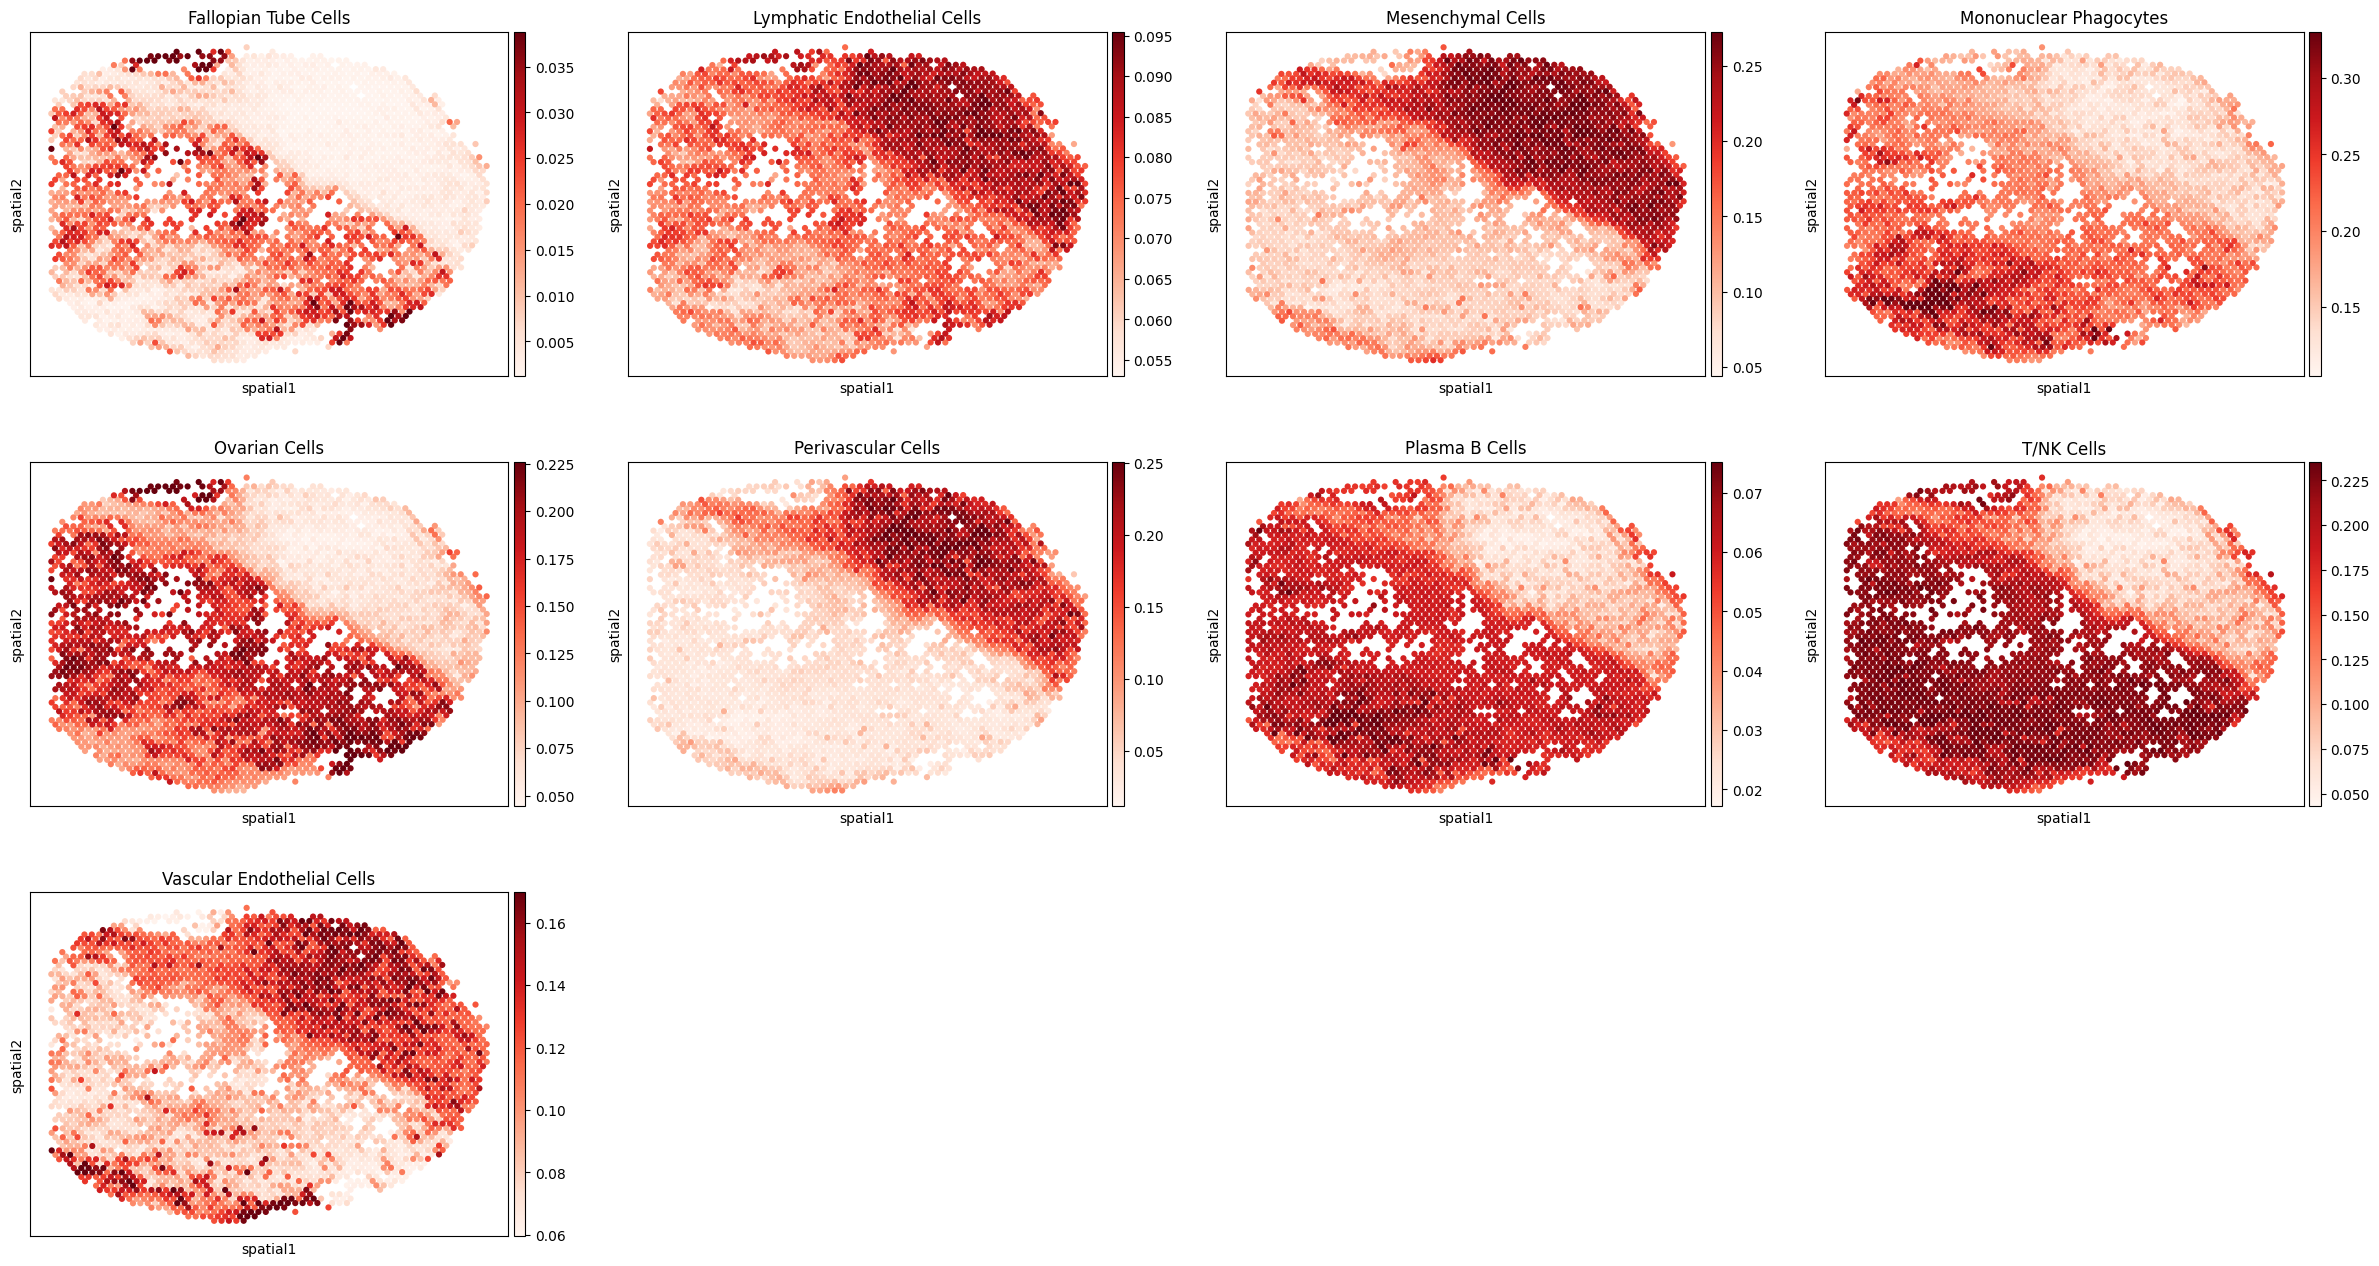

In [21]:
sc.pl.embedding(adata, basis="spatial", color=ct_list, cmap="Reds", s=80)

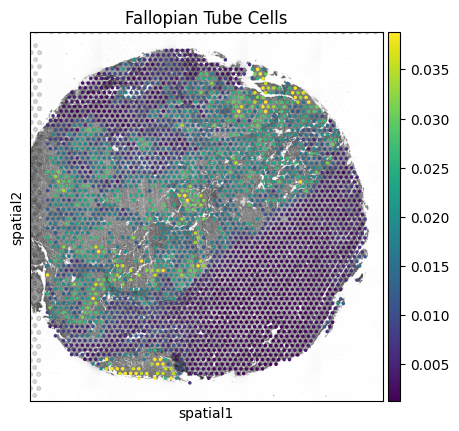

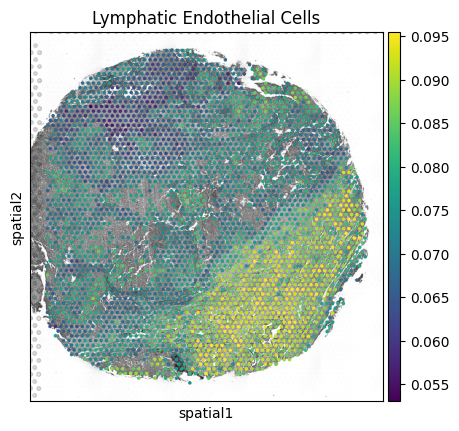

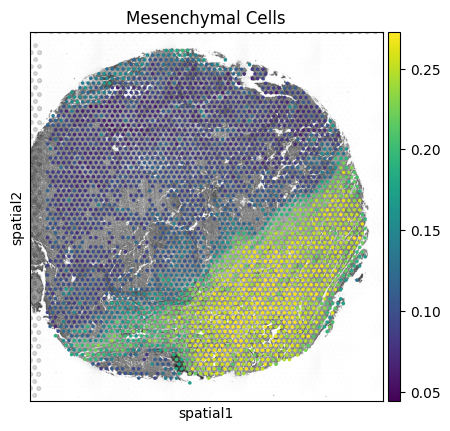

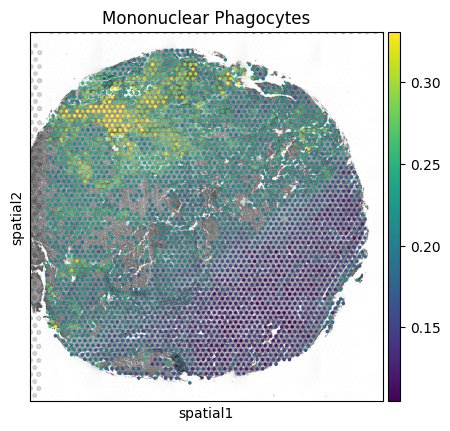

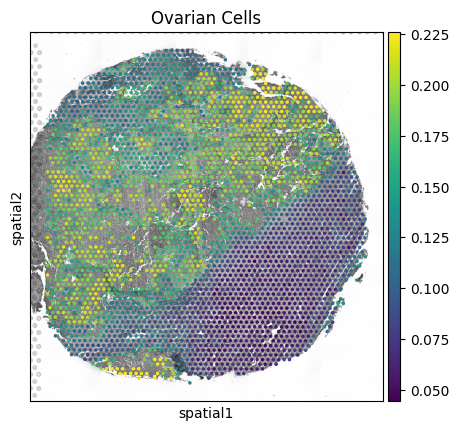

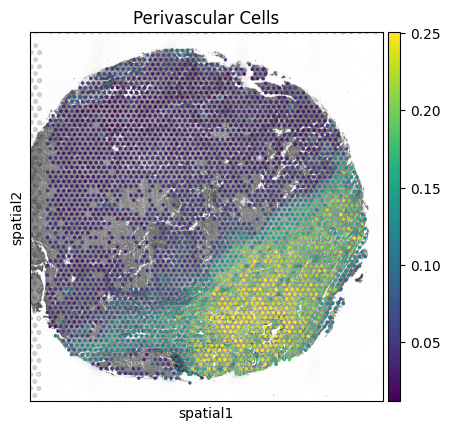

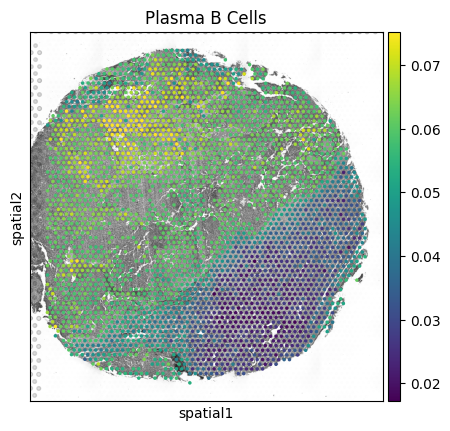

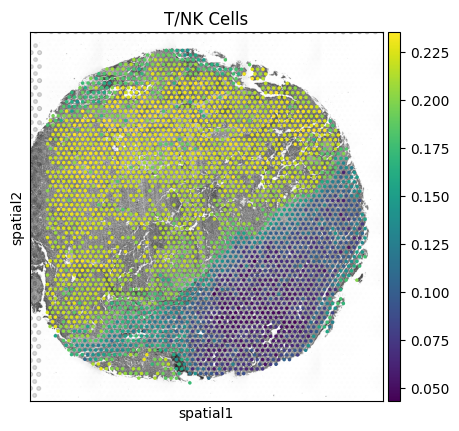

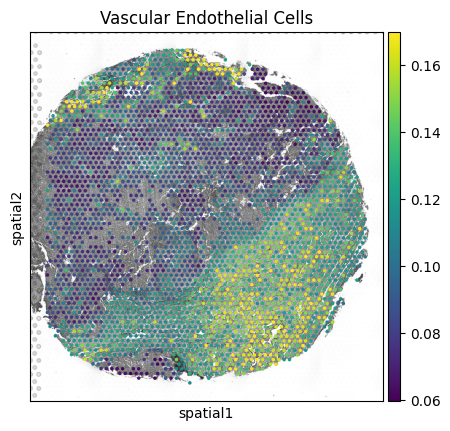

In [30]:
for _ in ct_list:
    sc.pl.spatial(adata, color = _, bw=True)

In [ ]:
#gamma = adata.get_gamma()["monocyte"]
#adata.obsm["monocyte_gamma"] = gamma
############## gama is not getable in h5ad format ##################

In [23]:
adata

AnnData object with n_obs × n_vars = 3115 × 2524
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', '_indices', 'Fallopian Tube Cells', 'Lymphatic Endothelial Cells', 'Mesenchymal Cells', 'Mononuclear Phagocytes', 'Ovarian Cells', 'Perivascular Cells', 'Plasma B Cells', 'T/NK Cells', 'Vascular Endothelial Cells'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_um